In [47]:
import requests as r
import pandas as pd
import seaborn as sns
import time

## Данные городов

In [2]:
areas = [
    #Основная десятка
    {"id":"88","name":"Казань"},
    {"id":"54","name":"Красноярск"},
    {"id":"76","name":"Ростов-на-Дону"},
    {"id":"104","name":"Челябинск"},
    {"id":"1","name":"Москва"},
    {"id":"2","name":"Санкт-Петербург"},
    {"id":"3","name":"Екатеринбург"},
    {"id":"68","name":"Омск"},
    {"id":"66","name":"Нижний Новгород"},
    {"id":"4","name":"Новосибирск"}
    ]

## Ввод данных

In [49]:
job = input() #Ввод работы
accuracy = int(input()) #Ввод количества объявлений 
page = int(input()) #Ввод страниц

повар
100
2


In [50]:
list_job = {} 

for i in range(len(areas)):
    k = areas[i]['id'] # id города
    list_n = [] 
    print(areas[i]['name'], "\n")
    for n in range(page):
        for j in range(accuracy):
            try:
                
                url = r.get(f'https://api.hh.ru/vacancies?only_with_salary=true&text={job}&area={k}&per_page={accuracy}&page={page}').json()['items'][j]['salary'] #достаём зарплату 
                if url['from'] == None: # если 'from': None, 'to': 1,
                    list_n.append(url['to'])
                elif url['to'] == None: # если 'from': 1, 'to': None
                    list_n.append(url['from'])
                else: # если 'from': 1, 'to': 1
                    if url['currency'] == 'USD': #перевод долларов в рубли
                        url['from'] *= 100
                        url['to'] *= 100
                    median_of_nums = int((url['from'] + url['to']) / 2) 
                    list_n.append(median_of_nums)
                print(j, '', url)
                
            except IndexError:
                print('браток ты наложал')
                continue
                
            except requests.exceptions.ReadTimeout:
                print("\n Переподключение к серверам hh.ru \n")
                time.sleep(3)
            
        list_job[areas[i]['name']] = list_n

Казань 

0  {'from': 30000, 'to': None, 'currency': 'RUR', 'gross': False}
1  {'from': 46800, 'to': 68000, 'currency': 'RUR', 'gross': False}
2  {'from': 60, 'to': None, 'currency': 'RUR', 'gross': False}
3  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': False}
4  {'from': 55000, 'to': None, 'currency': 'RUR', 'gross': False}
5  {'from': 37200, 'to': 60480, 'currency': 'RUR', 'gross': False}
6  {'from': 38000, 'to': 50000, 'currency': 'RUR', 'gross': True}
7  {'from': 20000, 'to': None, 'currency': 'RUR', 'gross': True}
8  {'from': 60000, 'to': 100000, 'currency': 'RUR', 'gross': False}
9  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
10  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': True}
11  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False}
12  {'from': 40000, 'to': 40000, 'currency': 'RUR', 'gross': True}
13  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False}
14  {'from': 40000, 'to': 55000, 'currency': 'RUR', 'gross': Tr

23  {'from': 42000, 'to': 50000, 'currency': 'RUR', 'gross': False}
24  {'from': 30000, 'to': None, 'currency': 'RUR', 'gross': False}
25  {'from': None, 'to': 25500, 'currency': 'RUR', 'gross': False}
26  {'from': 35000, 'to': 48000, 'currency': 'RUR', 'gross': False}
27  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
28  {'from': 89600, 'to': 159600, 'currency': 'RUR', 'gross': False}
29  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': True}
30  {'from': 50000, 'to': 70000, 'currency': 'RUR', 'gross': False}
31  {'from': 90000, 'to': None, 'currency': 'RUR', 'gross': False}
32  {'from': 40000, 'to': 65000, 'currency': 'RUR', 'gross': False}
33  {'from': 46200, 'to': 57000, 'currency': 'RUR', 'gross': True}
34  {'from': 37500, 'to': 42000, 'currency': 'RUR', 'gross': False}
35  {'from': 37000, 'to': 40000, 'currency': 'RUR', 'gross': True}
36  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
37  {'from': 58000, 'to': None, 'currency': 'RUR', 'gros

45  {'from': 130000, 'to': 150000, 'currency': 'RUR', 'gross': False}
46  {'from': 40000, 'to': 45000, 'currency': 'RUR', 'gross': False}
47  {'from': 60000, 'to': 80000, 'currency': 'RUR', 'gross': False}
48  {'from': 50000, 'to': 70000, 'currency': 'RUR', 'gross': False}
49  {'from': 33550, 'to': None, 'currency': 'RUR', 'gross': False}
50  {'from': 95000, 'to': 95000, 'currency': 'RUR', 'gross': False}
51  {'from': 36000, 'to': 38000, 'currency': 'RUR', 'gross': False}
52  {'from': None, 'to': 30000, 'currency': 'RUR', 'gross': False}
53  {'from': 15000, 'to': 16000, 'currency': 'RUR', 'gross': False}
54  {'from': 57000, 'to': None, 'currency': 'RUR', 'gross': False}
55  {'from': 30000, 'to': 45000, 'currency': 'RUR', 'gross': True}
56  {'from': 126000, 'to': 145718, 'currency': 'RUR', 'gross': False}
57  {'from': 37000, 'to': 50000, 'currency': 'RUR', 'gross': True}
58  {'from': 120000, 'to': 135000, 'currency': 'RUR', 'gross': False}
59  {'from': 37000, 'to': 50000, 'currency': 'R

67  {'from': 36000, 'to': 45000, 'currency': 'RUR', 'gross': False}
68  {'from': 55000, 'to': 60000, 'currency': 'RUR', 'gross': False}
69  {'from': 50000, 'to': 70000, 'currency': 'RUR', 'gross': False}
70  {'from': 50000, 'to': 65000, 'currency': 'RUR', 'gross': False}
71  {'from': 50000, 'to': 60000, 'currency': 'RUR', 'gross': True}
72  {'from': 45000, 'to': None, 'currency': 'RUR', 'gross': False}
73  {'from': 51000, 'to': None, 'currency': 'RUR', 'gross': False}
74  {'from': 70000, 'to': 105000, 'currency': 'RUR', 'gross': False}
75  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross': False}
76  {'from': 32000, 'to': None, 'currency': 'RUR', 'gross': False}
77  {'from': 37000, 'to': 50000, 'currency': 'RUR', 'gross': True}
78  {'from': 82750, 'to': 82750, 'currency': 'RUR', 'gross': True}
79  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
80  {'from': 37000, 'to': 50000, 'currency': 'RUR', 'gross': True}
81  {'from': 45000, 'to': None, 'currency': 'RUR', 'gros

89  {'from': 75000, 'to': None, 'currency': 'RUR', 'gross': False}
90  {'from': 42300, 'to': 44000, 'currency': 'RUR', 'gross': True}
91  {'from': 42000, 'to': 47000, 'currency': 'RUR', 'gross': True}
92  {'from': 42000, 'to': 47000, 'currency': 'RUR', 'gross': True}
93  {'from': 65000, 'to': 75000, 'currency': 'RUR', 'gross': False}
94  {'from': 40764, 'to': 45859, 'currency': 'RUR', 'gross': True}
95  {'from': 36000, 'to': None, 'currency': 'RUR', 'gross': True}
96  {'from': 55000, 'to': None, 'currency': 'RUR', 'gross': False}
97  {'from': 35000, 'to': 45000, 'currency': 'RUR', 'gross': True}
98  {'from': 55000, 'to': None, 'currency': 'RUR', 'gross': False}
99  {'from': 37800, 'to': 46100, 'currency': 'RUR', 'gross': True}
0  {'from': 2600, 'to': 3000, 'currency': 'RUR', 'gross': False}
1  {'from': 49000, 'to': None, 'currency': 'RUR', 'gross': True}
2  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
3  {'from': 23023, 'to': 25406, 'currency': 'RUR', 'gross': True}
4

12  {'from': None, 'to': 40000, 'currency': 'RUR', 'gross': True}
13  {'from': 28392, 'to': 35000, 'currency': 'RUR', 'gross': True}
14  {'from': 45000, 'to': None, 'currency': 'RUR', 'gross': False}
15  {'from': None, 'to': 40000, 'currency': 'RUR', 'gross': True}
16  {'from': 30000, 'to': 35000, 'currency': 'RUR', 'gross': True}
17  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross': False}
18  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross': False}
19  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False}
20  {'from': 28392, 'to': 35000, 'currency': 'RUR', 'gross': True}
21  {'from': 46200, 'to': 50400, 'currency': 'RUR', 'gross': False}
22  {'from': 30000, 'to': 40000, 'currency': 'RUR', 'gross': True}
23  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross': False}
24  {'from': 65000, 'to': None, 'currency': 'RUR', 'gross': False}
25  {'from': 28000, 'to': 35000, 'currency': 'RUR', 'gross': True}
26  {'from': 25000, 'to': None, 'currency': 'RUR', 'gross': Fal

35  {'from': 28392, 'to': 35000, 'currency': 'RUR', 'gross': True}
36  {'from': 27000, 'to': 34000, 'currency': 'RUR', 'gross': True}
37  {'from': 28392, 'to': 35000, 'currency': 'RUR', 'gross': True}
38  {'from': 45000, 'to': None, 'currency': 'RUR', 'gross': False}
39  {'from': 42240, 'to': 49920, 'currency': 'RUR', 'gross': False}
40  {'from': 23000, 'to': None, 'currency': 'RUR', 'gross': False}
41  {'from': 28000, 'to': None, 'currency': 'RUR', 'gross': False}
42  {'from': 29000, 'to': 35000, 'currency': 'RUR', 'gross': True}
43  {'from': 30000, 'to': None, 'currency': 'RUR', 'gross': False}
44  {'from': 30000, 'to': 40000, 'currency': 'RUR', 'gross': True}
45  {'from': 25000, 'to': 26000, 'currency': 'RUR', 'gross': False}
46  {'from': 26900, 'to': 34500, 'currency': 'RUR', 'gross': True}
47  {'from': 30000, 'to': None, 'currency': 'RUR', 'gross': False}
48  {'from': 56000, 'to': None, 'currency': 'RUR', 'gross': False}
49  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': 

57  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': True}
58  {'from': 75000, 'to': 120000, 'currency': 'RUR', 'gross': False}
59  {'from': 140000, 'to': 180000, 'currency': 'RUR', 'gross': True}
60  {'from': 70000, 'to': 75000, 'currency': 'RUR', 'gross': False}
61  {'from': 72000, 'to': None, 'currency': 'RUR', 'gross': False}
62  {'from': 100000, 'to': 250000, 'currency': 'RUR', 'gross': False}
63  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': False}
64  {'from': 95000, 'to': None, 'currency': 'RUR', 'gross': False}
65  {'from': 100000, 'to': 120000, 'currency': 'RUR', 'gross': False}
66  {'from': 200000, 'to': None, 'currency': 'RUR', 'gross': False}
67  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
68  {'from': 80000, 'to': 100000, 'currency': 'RUR', 'gross': False}
69  {'from': 90000, 'to': 100000, 'currency': 'RUR', 'gross': False}
70  {'from': None, 'to': 105000, 'currency': 'RUR', 'gross': True}
71  {'from': 87000, 'to': 95000, 'currency': 'R

78  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': False}
79  {'from': 100000, 'to': None, 'currency': 'RUR', 'gross': False}
80  {'from': 100000, 'to': 200000, 'currency': 'RUR', 'gross': False}
81  {'from': 85000, 'to': 90000, 'currency': 'RUR', 'gross': False}
82  {'from': 75000, 'to': 90000, 'currency': 'RUR', 'gross': False}
83  {'from': 51000, 'to': 100000, 'currency': 'RUR', 'gross': False}
84  {'from': 80000, 'to': 110000, 'currency': 'RUR', 'gross': False}
85  {'from': 200000, 'to': 200000, 'currency': 'RUR', 'gross': False}
86  {'from': 65000, 'to': 80000, 'currency': 'RUR', 'gross': False}
87  {'from': 80000, 'to': 90000, 'currency': 'RUR', 'gross': False}
88  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': False}
89  {'from': 90000, 'to': None, 'currency': 'RUR', 'gross': False}
90  {'from': 62000, 'to': 69000, 'currency': 'RUR', 'gross': False}
91  {'from': 90000, 'to': None, 'currency': 'RUR', 'gross': False}
92  {'from': 88000, 'to': None, 'currency': '

99  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
0  {'from': 13600, 'to': 34100, 'currency': 'RUR', 'gross': True}
1  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
2  {'from': 69000, 'to': 78000, 'currency': 'RUR', 'gross': False}
3  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
4  {'from': 75000, 'to': 80000, 'currency': 'RUR', 'gross': False}
5  {'from': 80000, 'to': 90000, 'currency': 'RUR', 'gross': False}
6  {'from': 70000, 'to': 100000, 'currency': 'RUR', 'gross': True}
7  {'from': 49590, 'to': 99200, 'currency': 'RUR', 'gross': False}
8  {'from': 80000, 'to': 90000, 'currency': 'RUR', 'gross': False}
9  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
10  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
11  {'from': 60000, 'to': 75000, 'currency': 'RUR', 'gross': False}
12  {'from': 40000, 'to': 50000, 'currency': 'RUR', 'gross': False}
13  {'from': 65000, 'to': None, 'currency': 'RUR', 'gross': Fals

21  {'from': 35000, 'to': 38000, 'currency': 'RUR', 'gross': True}
22  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
23  {'from': 33000, 'to': 36000, 'currency': 'RUR', 'gross': True}
24  {'from': 55000, 'to': 90000, 'currency': 'RUR', 'gross': False}
25  {'from': 250, 'to': 270, 'currency': 'RUR', 'gross': False}
26  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False}
27  {'from': 35000, 'to': 38000, 'currency': 'RUR', 'gross': True}
28  {'from': 32000, 'to': 37000, 'currency': 'RUR', 'gross': True}
29  {'from': 75000, 'to': None, 'currency': 'RUR', 'gross': False}
30  {'from': 65000, 'to': None, 'currency': 'RUR', 'gross': False}
31  {'from': 50000, 'to': 55000, 'currency': 'RUR', 'gross': False}
32  {'from': 30000, 'to': None, 'currency': 'RUR', 'gross': False}
33  {'from': 46600, 'to': 50100, 'currency': 'RUR', 'gross': True}
34  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
35  {'from': 45000, 'to': 65000, 'currency': 'RUR', 'gross': Fa

44  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross': False}
45  {'from': 35000, 'to': 38000, 'currency': 'RUR', 'gross': True}
46  {'from': 35000, 'to': 50000, 'currency': 'RUR', 'gross': False}
47  {'from': 30000, 'to': None, 'currency': 'RUR', 'gross': False}
48  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross': False}
49  {'from': 31000, 'to': 37000, 'currency': 'RUR', 'gross': True}
50  {'from': 80000, 'to': None, 'currency': 'RUR', 'gross': False}
51  {'from': 32500, 'to': 35000, 'currency': 'RUR', 'gross': True}
52  {'from': 30000, 'to': 35000, 'currency': 'RUR', 'gross': True}
53  {'from': 35000, 'to': 38000, 'currency': 'RUR', 'gross': True}
54  {'from': 75000, 'to': 90000, 'currency': 'RUR', 'gross': False}
55  {'from': 29000, 'to': 35000, 'currency': 'RUR', 'gross': True}
56  {'from': 35000, 'to': 38000, 'currency': 'RUR', 'gross': True}
57  {'from': 35000, 'to': 40000, 'currency': 'RUR', 'gross': True}
58  {'from': 35000, 'to': 38000, 'currency': 'RUR', 'gross':

66  {'from': 30000, 'to': None, 'currency': 'RUR', 'gross': False}
67  {'from': 28548, 'to': 39100, 'currency': 'RUR', 'gross': True}
68  {'from': 29000, 'to': 39000, 'currency': 'RUR', 'gross': True}
69  {'from': 3000, 'to': None, 'currency': 'RUR', 'gross': False}
70  {'from': 35000, 'to': None, 'currency': 'RUR', 'gross': False}
71  {'from': 54000, 'to': None, 'currency': 'RUR', 'gross': False}
72  {'from': 29000, 'to': 39000, 'currency': 'RUR', 'gross': True}
73  {'from': 32000, 'to': None, 'currency': 'RUR', 'gross': False}
74  {'from': None, 'to': 150000, 'currency': 'RUR', 'gross': False}
75  {'from': 29000, 'to': 39000, 'currency': 'RUR', 'gross': True}
76  {'from': 112000, 'to': 117000, 'currency': 'RUR', 'gross': False}
77  {'from': 30000, 'to': 40000, 'currency': 'RUR', 'gross': True}
78  {'from': 35000, 'to': 38000, 'currency': 'RUR', 'gross': False}
79  {'from': 35000, 'to': None, 'currency': 'RUR', 'gross': False}
80  {'from': 27000, 'to': 30000, 'currency': 'RUR', 'gross

88  {'from': 46100, 'to': 53000, 'currency': 'RUR', 'gross': True}
89  {'from': 46100, 'to': 53000, 'currency': 'RUR', 'gross': True}
90  {'from': 29000, 'to': 39000, 'currency': 'RUR', 'gross': True}
91  {'from': 32600, 'to': 37200, 'currency': 'RUR', 'gross': True}
92  {'from': 30000, 'to': None, 'currency': 'RUR', 'gross': False}
93  {'from': 30000, 'to': 40000, 'currency': 'RUR', 'gross': True}
94  {'from': 40000, 'to': 45400, 'currency': 'RUR', 'gross': True}
95  {'from': 42000, 'to': 45000, 'currency': 'RUR', 'gross': False}
96  {'from': 33000, 'to': None, 'currency': 'RUR', 'gross': False}
97  {'from': 29000, 'to': 39000, 'currency': 'RUR', 'gross': True}
98  {'from': 33200, 'to': 39000, 'currency': 'RUR', 'gross': True}
99  {'from': 45000, 'to': 60000, 'currency': 'RUR', 'gross': True}
Нижний Новгород 

0  {'from': 46500, 'to': 49700, 'currency': 'RUR', 'gross': True}
1  {'from': 35000, 'to': None, 'currency': 'RUR', 'gross': False}
2  {'from': 36855, 'to': 44100, 'currency': '

11  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False}
12  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': True}
13  {'from': 45900, 'to': 48900, 'currency': 'RUR', 'gross': True}
14  {'from': 37100, 'to': 42600, 'currency': 'RUR', 'gross': True}
15  {'from': 48000, 'to': 58000, 'currency': 'RUR', 'gross': False}
16  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False}
17  {'from': 42000, 'to': None, 'currency': 'RUR', 'gross': True}
18  {'from': 37100, 'to': 41000, 'currency': 'RUR', 'gross': True}
19  {'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}
20  {'from': 58800, 'to': 62000, 'currency': 'RUR', 'gross': False}
21  {'from': 46600, 'to': 49700, 'currency': 'RUR', 'gross': True}
22  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False}
23  {'from': 28350, 'to': 31540, 'currency': 'RUR', 'gross': True}
24  {'from': 38000, 'to': 41600, 'currency': 'RUR', 'gross': True}
25  {'from': 42000, 'to': None, 'currency': 'RUR', 'gross': Tr

34  {'from': 34000, 'to': 46000, 'currency': 'RUR', 'gross': True}
35  {'from': 34000, 'to': 46000, 'currency': 'RUR', 'gross': True}
36  {'from': 45000, 'to': 60000, 'currency': 'RUR', 'gross': False}
37  {'from': 50000, 'to': 60000, 'currency': 'RUR', 'gross': False}
38  {'from': 50000, 'to': None, 'currency': 'RUR', 'gross': False}
39  {'from': 40000, 'to': 68000, 'currency': 'RUR', 'gross': False}
40  {'from': 39000, 'to': None, 'currency': 'RUR', 'gross': False}
41  {'from': 55000, 'to': 70000, 'currency': 'RUR', 'gross': False}
42  {'from': 53000, 'to': None, 'currency': 'RUR', 'gross': False}
43  {'from': 34000, 'to': 46000, 'currency': 'RUR', 'gross': True}
44  {'from': 22000, 'to': None, 'currency': 'RUR', 'gross': False}
45  {'from': 34000, 'to': 46000, 'currency': 'RUR', 'gross': True}
46  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
47  {'from': 50000, 'to': 55000, 'currency': 'RUR', 'gross': False}
48  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross

56  {'from': 40000, 'to': 65000, 'currency': 'RUR', 'gross': False}
57  {'from': 40000, 'to': 50000, 'currency': 'RUR', 'gross': False}
58  {'from': 24558, 'to': 30697, 'currency': 'RUR', 'gross': True}
59  {'from': 34000, 'to': 46000, 'currency': 'RUR', 'gross': True}
60  {'from': 40000, 'to': None, 'currency': 'RUR', 'gross': False}
61  {'from': 27000, 'to': 33000, 'currency': 'RUR', 'gross': False}
62  {'from': 50000, 'to': 80000, 'currency': 'RUR', 'gross': False}
63  {'from': 30000, 'to': None, 'currency': 'RUR', 'gross': False}
64  {'from': 35000, 'to': 35000, 'currency': 'RUR', 'gross': False}
65  {'from': 43000, 'to': 43000, 'currency': 'RUR', 'gross': False}
66  {'from': None, 'to': 180000, 'currency': 'RUR', 'gross': False}
67  {'from': 34000, 'to': 46000, 'currency': 'RUR', 'gross': True}
68  {'from': 70000, 'to': 90000, 'currency': 'RUR', 'gross': False}
69  {'from': 60000, 'to': None, 'currency': 'RUR', 'gross': False}
70  {'from': 45000, 'to': None, 'currency': 'RUR', 'gr

## Get data

In [3]:
data = {'cost':[], 'city':[]}
for i in range(len(areas)):
    for n in range(page):
        for j in range(accuracy):
            data['city'].append(areas[i]['name'])
            data['cost'].append(list_job[areas[i]['name']][j])

NameError: name 'page' is not defined

In [81]:
saler = pd.DataFrame(data)
# saler = saler.sort_values('cost')
saler

,cost,city
0,30000,Казань
1,60000,Красноярск
2,2800,Ростов-на-Дону
3,35000,Челябинск
4,145000,Москва
5,23850,Санкт-Петербург
6,97000,Екатеринбург
7,40000,Омск
8,48100,Нижний Новгород
9,50600,Новосибирск


<Axes: xlabel='cost', ylabel='city'>

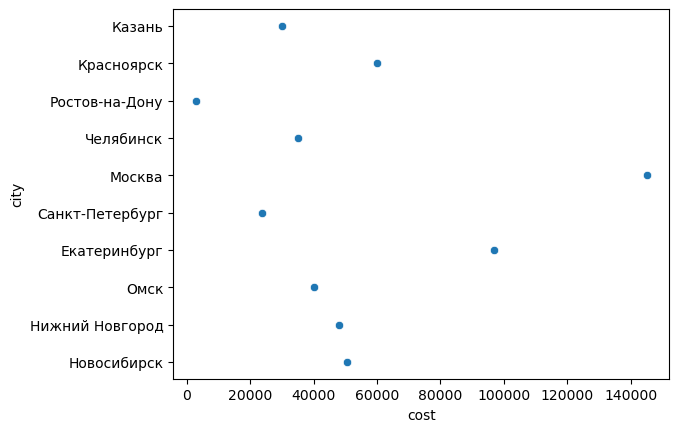

In [82]:
sns.scatterplot(data=saler, x="cost", y="city") #10

<Axes: xlabel='cost', ylabel='city'>

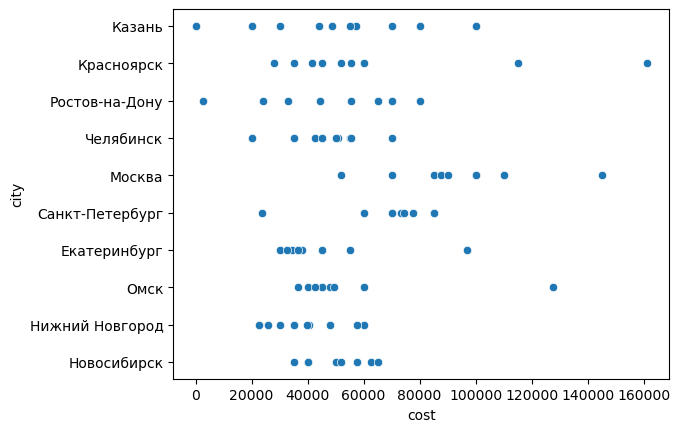

In [77]:
sns.scatterplot(data=saler, x="cost", y="city") #100

<Axes: xlabel='cost', ylabel='city'>

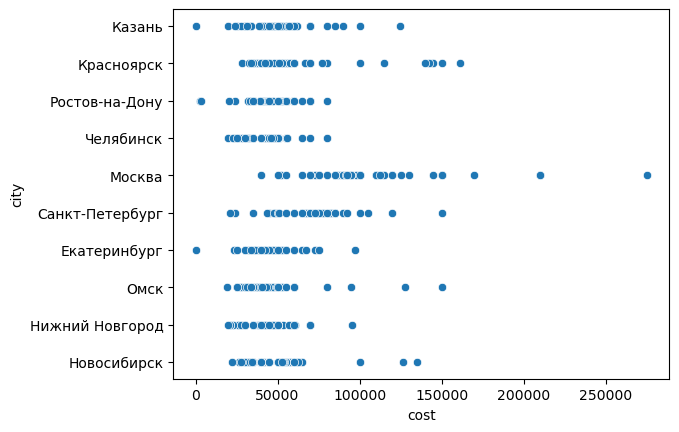

In [63]:
sns.scatterplot(data=saler, x="cost", y="city") #500

<Axes: xlabel='cost', ylabel='city'>

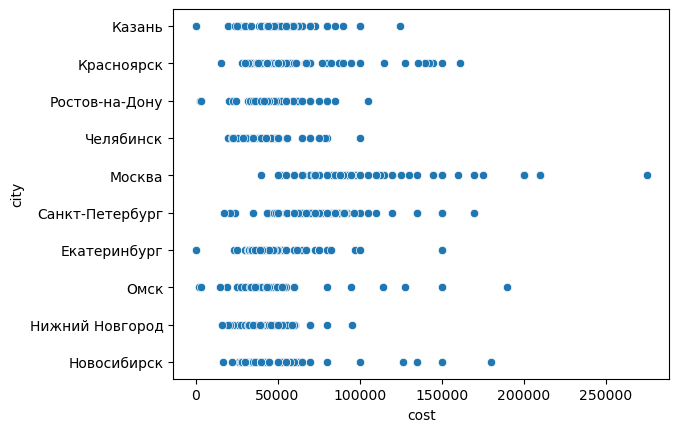

In [59]:
sns.scatterplot(data=saler, x="cost", y="city") #1000

<Axes: xlabel='cost', ylabel='city'>

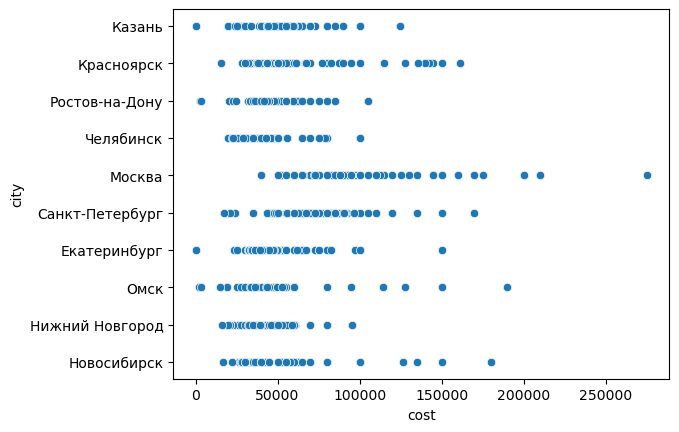

In [55]:
sns.scatterplot(data=saler, x="cost", y="city") #2000

<Axes: xlabel='cost', ylabel='city'>

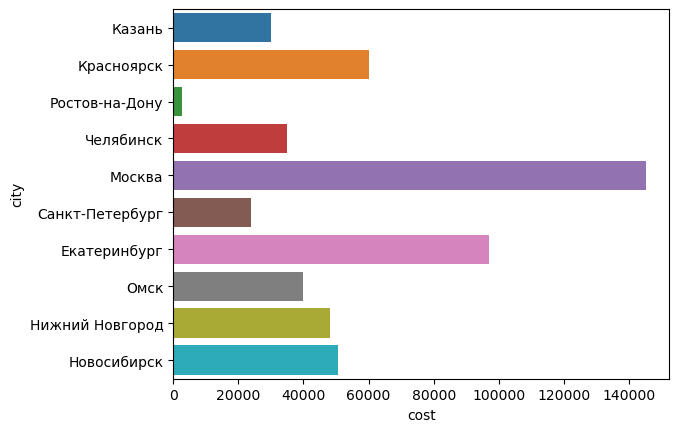

In [83]:
sns.barplot(data=saler, x="cost", y="city") #10

<Axes: xlabel='cost', ylabel='city'>

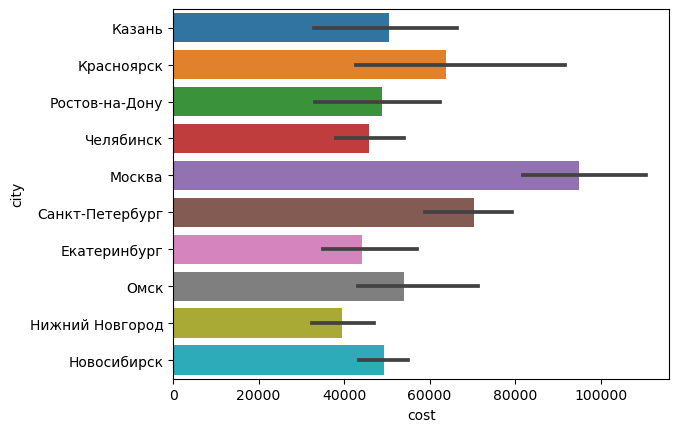

In [78]:
sns.barplot(data=saler, x="cost", y="city") #100

<Axes: xlabel='cost', ylabel='city'>

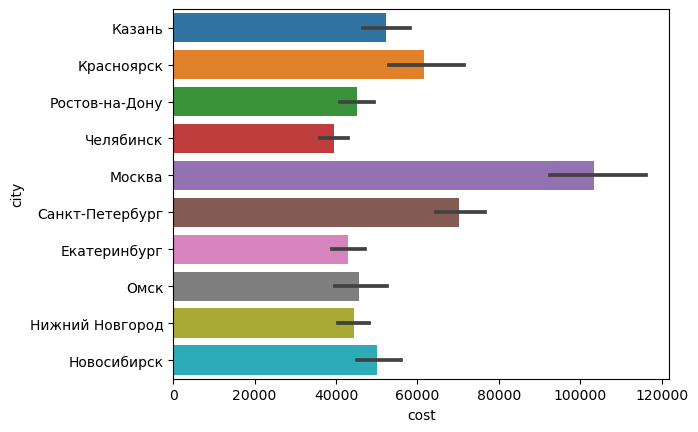

In [64]:
sns.barplot(data=saler, x="cost", y="city") #500

<Axes: xlabel='cost', ylabel='city'>

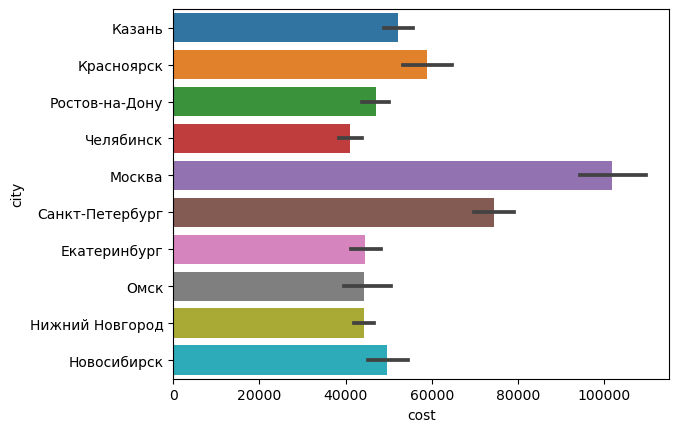

In [60]:
sns.barplot(data=saler, x="cost", y="city") #1000

<Axes: xlabel='cost', ylabel='city'>

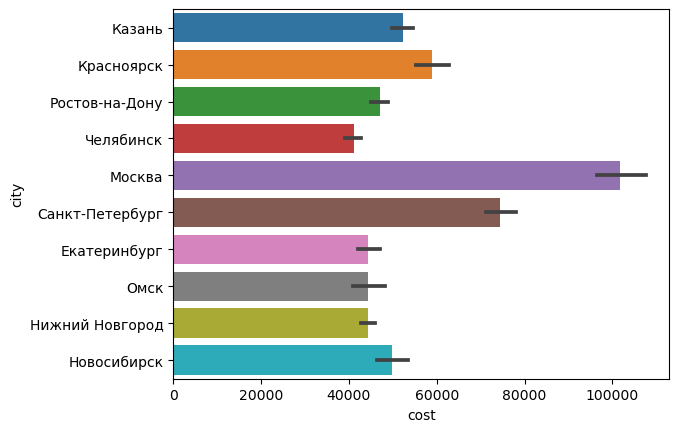

In [56]:
sns.barplot(data=saler, x="cost", y="city") #2000